In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

from tensorflow.keras.datasets import reuters # 로이터 뉴스 데이터셋

Using TensorFlow backend.


In [0]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [4]:
# 로이터 데이터 불러오기. 테스트셋이 20%
# num_words: 사용 빈도가 많은 단어 1000개 불러오기 (빈도: 1~1000)
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [5]:
# 데이터 확인
# 46개의 카테고리로 구분
# 단어가 아닌 숫자 출력됨. 해당 단어가 출현 빈도수에 따라 번호 붙임. (Tokenizing 끝난 데이터)
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0]) 

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [0]:
# 데이터 전처리
# sequence(): 각 기사의 단어 수 동일하게 맞춰 줌
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

# One-hot encoding
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [0]:
model = Sequential()
model.add(Embedding(1000, 100)) # Embedding(input_dim, outpit_dim)
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

Epoch 1/20
90/90 [==============================] - 1s 17ms/step - loss: 2.5769 - accuracy: 0.3497 - val_loss: 2.1718 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 1s 12ms/step - loss: 2.0411 - accuracy: 0.4888 - val_loss: 2.0304 - val_accuracy: 0.4947
Epoch 3/20
90/90 [==============================] - 1s 12ms/step - loss: 1.8896 - accuracy: 0.5140 - val_loss: 1.8220 - val_accuracy: 0.5232
Epoch 4/20
90/90 [==============================] - 1s 12ms/step - loss: 1.7427 - accuracy: 0.5492 - val_loss: 1.7868 - val_accuracy: 0.5463
Epoch 5/20
90/90 [==============================] - 1s 12ms/step - loss: 1.7232 - accuracy: 0.5564 - val_loss: 1.7450 - val_accuracy: 0.5476
Epoch 6/20
90/90 [==============================] - 1s 12ms/step - loss: 1.6153 - accuracy: 0.5888 - val_loss: 1.6218 - val_accuracy: 0.6100
Epoch 7/20
90/90 [==============================] - 1s 12ms/step - loss: 1.4990 - accuracy: 0.6263 - val_loss: 1.5386 - val_accuracy: 0.6198
Epoch 8/20
90

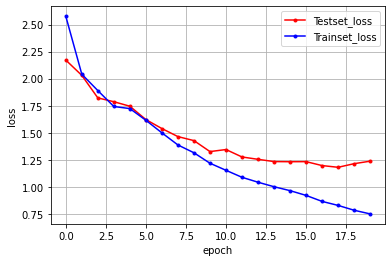

In [9]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()